In [2]:
import numpy as np
import matplotlib.pyplot as plt

N = 134000

I0, R0 = 1, 0
S0 = N - I0 - R0
beta, gamma = 2, 1
# T_max is 30
t = np.linspace(0, 30, 30)

def derivative(S, I, R, t, N, beta, gamma):
    #S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt


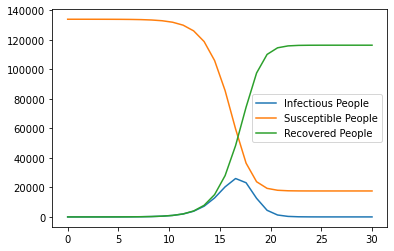

In [3]:
def integral(t, N, beta, gamma):
    
    # Explicit Euler Method
    S_new = np.zeros(len(t))
    I_new = np.zeros(len(t)) 
    R_new = np.zeros(len(t)) 
    dSdt = np.zeros(len(t)) 
    dIdt = np.zeros(len(t)) 
    dRdt = np.zeros(len(t))
    
    S_new[0] = S0
    I_new[0] = I0
    R_new[0] = R0
    
    dSdt[0], dIdt[0], dRdt[0] = derivative(S0, I0, R0, t, N, beta, gamma)
    
    for i in range(0, len(t) - 1):
        # delta_t = 1
        S_new[i + 1] = S_new[i] + dSdt[i]
        I_new[i + 1] = I_new[i] + dIdt[i]
        R_new[i + 1] = R_new[i] + dRdt[i]
        dSdt[i+1], dIdt[i+1], dRdt[i+1] = derivative(S_new[i+1], I_new[i+1], R_new[i+1], t, N, beta, gamma)
    return S_new, I_new, R_new

S_new, I_new, R_new = integral(t, N, beta, gamma)

plt.plot(t, I_new, label = 'Infectious People')
plt.plot(t, S_new, label = 'Susceptible People')
plt.plot(t, R_new, label = 'Recovered People')
plt.legend()
plt.show()

In [4]:
I_max = int(max(I_new))

result = list(np.where(I_new == max(I_new)))
print(int(result[0][0]))
print(I_max)

16
26033


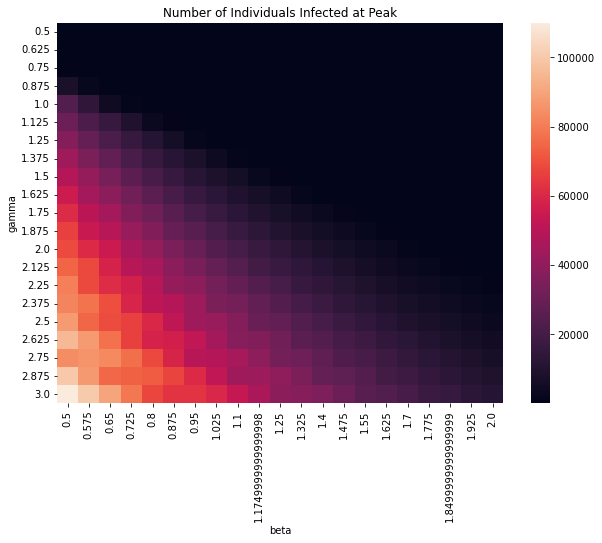

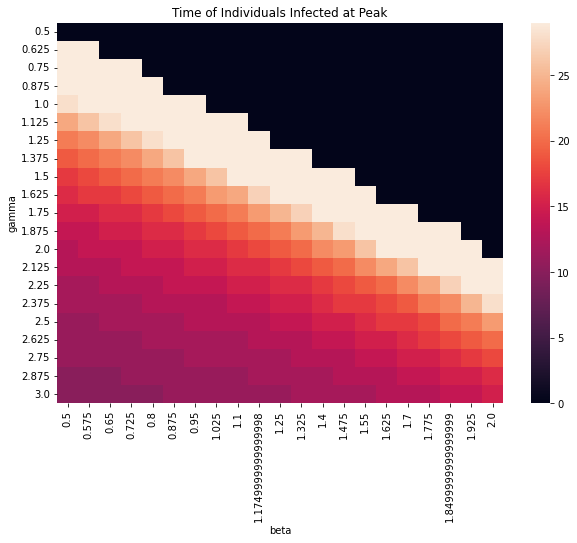

In [9]:
import seaborn as sns
import pandas as pd

beta = np.linspace(0.5, 3, 21)
gamma = np.linspace(0.5, 2, 21)
I_lst = []
I_max = []
t_max = []
I_peak = []

for i in range (21):
    for j in range (21):
        S_new, I_new, R_new = integral(t, N, beta[i], gamma[j])
        I_lst.append(I_new.tolist())

# print(I_lst[0].index(max(I_lst[0])))
for i in range (441):
    I_max.append(int(max(I_lst[i])))
    t_max.append(I_lst[i].index(max(I_lst[i])))

I_peak = [I_max[i:i+21] for i in range(0, len(I_max), 21)]
t_peak = [t_max[i:i+21] for i in range(0, len(t_max), 21)]

df = pd.DataFrame(I_peak, index = beta,columns = gamma)
plt.figure(figsize = (10,7))
plt.title('Number of Individuals Infected at Peak')
sns.heatmap(df, annot = False)
plt.xlabel('beta')
plt.ylabel('gamma')
plt.show()

df_2 = pd.DataFrame(t_peak, index = beta,columns = gamma)
plt.figure(figsize = (10,7))
plt.title('Time of Individuals Infected at Peak')
sns.heatmap(df_2, annot = False)
plt.xlabel('beta')
plt.ylabel('gamma')
plt.show()